# CNN _ CIFAR-10 CLASSIFICATION
by Durand- -Vegas Johann

MS AIMove Student

The objective of this work is to propose a deep learning algorithm able to classify images from the Cifar-10 dataset into 10 classes (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck). To solve this problem, it is required to implement a Convolutional Neural Network (CNN). The Cifar-10 used consists of 2 datasets, training and testing dataset, respectively composed of 50 000 and 10 000 images.

.

This work has been done in 3 steps, a first "primitive" test in order to have a first view on the performance that can be obtained with a rather simple CNN architecture and raw data. 

Then, a second more elaborated test is proposed which will have allowed to improve the performances of the CNN through the use of several methods (data augmentation, padding, more complex architecture of the model, dropout, ...). 

And Finally, a final test was performed to try to go further.  

# INITIALIZATION

First, we start by importing the tools and libraries we will need to load and process the data, create the deep learning model, train it, and finaly, evaluate it. In this work, we will mainly use the tools proposed by keras and tensorflow libraries.

° SETUP

In [1]:
# Standard libraries
import os 
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Cifar-10 Dataset
from tensorflow.keras.datasets import cifar10

# ML libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Evaluation tools
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

° MOUNTING GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Attention, you have to choose if you want to mount the google drive on which you could have stored a version of the Cifar-10 dataset, or directly download it from the following part.

Personally, I chose the second option, either directly download the dataset via the method cifar.load_data()

° LOADING DATAS

In [4]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Turn the train and test into one hot encoding (check the shape to understand)
# Ex: 6 --> [0, 0, 0, 0, 0, 1, 0, 0, 0]
y_train_HE = to_categorical(y_train, num_classes=10)
y_test_HE = to_categorical(y_test, num_classes=10)

print("\nShape of x_train",x_train.shape)
print("Shape of x_test", x_test.shape)
print("\nShape of y_train",y_train.shape)
print("Shape of y_test", y_test.shape)
print("\nShape of y_train_HE",y_train_HE.shape)
print("Shape of y_test_HE", y_test_HE.shape)

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


Shape of x_train (50000, 32, 32, 3)
Shape of x_test (10000, 32, 32, 3)

Shape of y_train (50000, 1)
Shape of y_test (10000, 1)

Shape of y_train_HE (50000, 10)
Shape of y_test_HE (10000, 10)


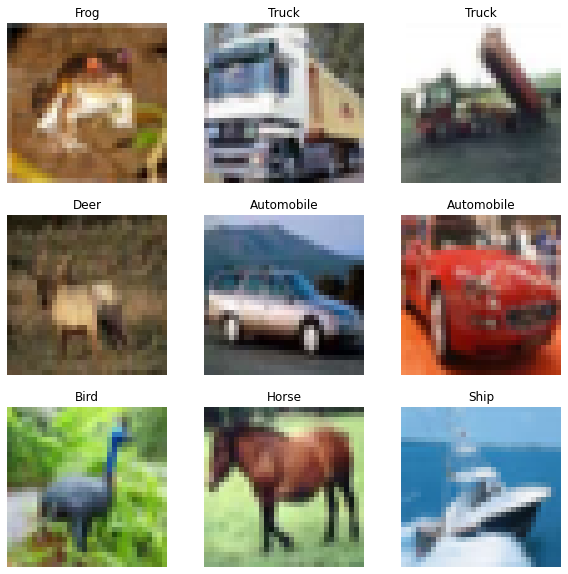

In [5]:
# Visualize samples
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
  plt.title(classes[list(y_train_HE[i]).index(max(y_train_HE[i]))])
  plt.axis("off")

In [6]:
# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 1 _ BASIC TRIAL

° DATA NORMALIZATION

In [7]:
# Normalize data
x_train_Normalized = x_train / 255.
x_test_Normalized = x_test / 255.

print("Train Min:", x_train_Normalized.min())
print("Train Max:", x_train_Normalized.max())
#print(f'Nombre de batches // Train: {len(x_train_Normalized)}')

print("Test Min:", x_test_Normalized.min())
print("Test Max:", x_test_Normalized.max())
#print(f'Nombre de batches // Val: {len(x_test_Normalized)}')

Train Min: 0.0
Train Max: 1.0
Test Min: 0.0
Test Max: 1.0


° DEFINE MODEL

In [8]:
model = Sequential ()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

° FIT/TRAIN MODEL

In [9]:
hist = model.fit(x_train_Normalized, y_train_HE, batch_size=64, epochs=20, validation_split=0.2, verbose=1)


Epoch 1/20
625/625 [==============================] - 12s 17ms/step - loss: 1.6569 - accuracy: 0.3859 - val_loss: 1.3760 - val_accuracy: 0.5119
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 1.2482 - accuracy: 0.5561 - val_loss: 1.1582 - val_accuracy: 0.5951
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 1.0785 - accuracy: 0.6194 - val_loss: 1.0618 - val_accuracy: 0.6235
Epoch 4/20
625/625 [==============================] - 10s 17ms/step - loss: 0.9600 - accuracy: 0.6612 - val_loss: 0.9694 - val_accuracy: 0.6666
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 0.8750 - accuracy: 0.6955 - val_loss: 0.9583 - val_accuracy: 0.6685
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.7968 - accuracy: 0.7214 - val_loss: 0.9313 - val_accuracy: 0.6804
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.7335 - accuracy: 0.7420 - val_loss: 0.9059 - val_accuracy: 

° DATA BACKUP

In [10]:
# Save the model 1 as h5 file
#model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models', 'Cifar-10_Classifier_Model1.h5'))
#model.save(os.path.join('Cifar-10_Classifier_Model1.h5'))

# Save histrory of the model 1
#np.save('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_hist_model.npy',hist)
#np.save('Cifar-10_hist_model.npy',hist)



In [ ]:
# Load the model saved 
#model = load_model('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_Classifier_Model1.h5')
#model = load_model('Cifar-10_Saved_Models/Cifar-10_Classifier_Model1.h5')

# Load history model 1
#hist = np.load('/content/drive/MyDrive/Colab Notebooks/MCifar-10_Saved_Models/Cifar-10_hist_model.npy',allow_pickle='TRUE').item()
#hist = np.load('Cifar-10_hist_model.npy',allow_pickle='TRUE').item()


° VISUALIZATION

In [11]:
# Ultimate score visualization
score = model.evaluate(x_test_Normalized, y_test_HE, verbose=1)
print(f'Val loss: {score[0]: 4.4f}')
print(f'Val accuracy: {score[1]: 4.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 1.3080 - accuracy: 0.7026
Val loss:  1.3080
Val accuracy:  0.7026


At the end of this first test from a simple architecture CNN and raw data, we quickly see after a few iterations that the model is not performing at all for our classification task. Indeed, the error (Loss) is high (1.31) and the accuracy is 70.26%, what means about two chance out of 3 to predict the right class of an image. 

By observing the curves of the evolution of the loss and the accuracy according to the number of epochs, we notice indeed that the curves of test do not fit at all to the curves of training.

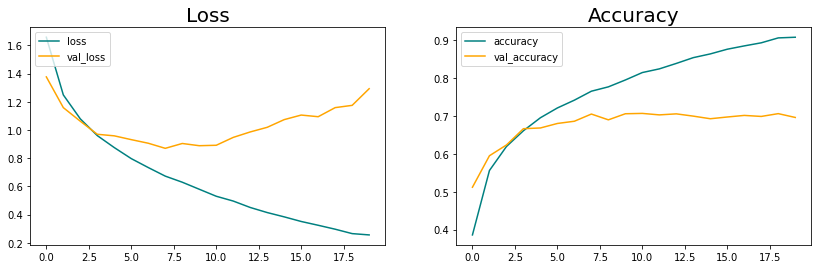

In [12]:
plt.figure(figsize=(14,4))

# Loss visualization
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc='upper left')

# Accuracy visualisation
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

° EVALUATION METRICS

To evaluate the performance of the model, a good method is to display the confusion matrix. That is to say, to highlight whether the values predicted are correct or not, and in which proportion. 

In [13]:
# Predicting 
y_test_pred = model.predict(x_test_Normalized).argmax(axis=1)

#print(y_test_pred)
#print('\n', y_test)

# Creating a confution matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)

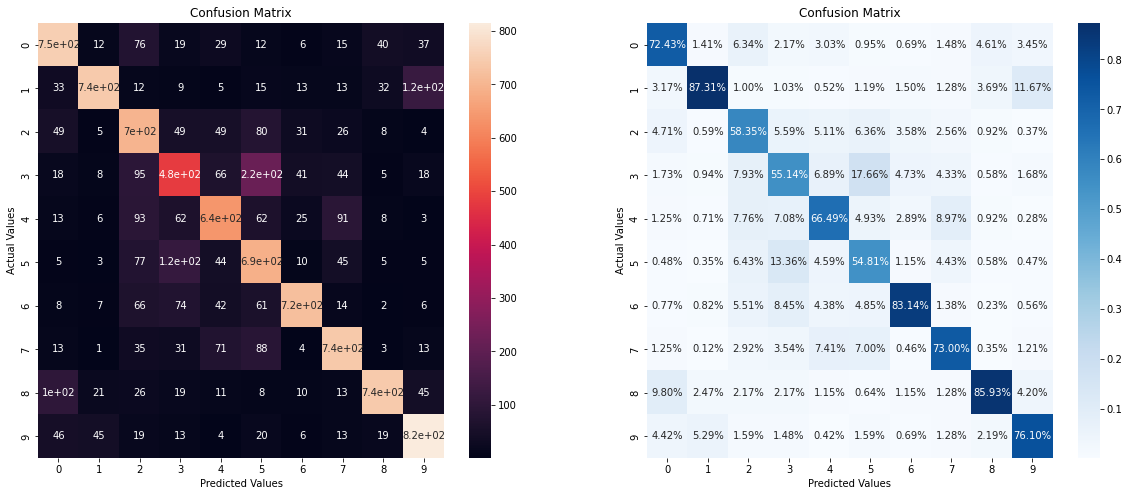

In [14]:
# Vizualise the confusion matrix through seaborn library
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.subplot(1,2,2)
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

Looking at the confusion matrix, we realize that no class is correctly predicted at 100%. All images present an erroneous prediction proportion.

To make the study a little more precise we can calculate the precision, recall and f1-score indicators. To do this, we can display the classification report.

In [15]:
# Plotting a classification report
print('\nClassification Report:\n', classification_report(y_test, y_test_pred, target_names=classes))



Classification Report:
               precision    recall  f1-score   support

    Airplane       0.72      0.75      0.74      1000
  Automobile       0.87      0.74      0.80      1000
        Bird       0.58      0.70      0.64      1000
         Cat       0.55      0.48      0.51      1000
        Deer       0.66      0.64      0.65      1000
         Dog       0.55      0.69      0.61      1000
        Frog       0.83      0.72      0.77      1000
       Horse       0.73      0.74      0.74      1000
        Ship       0.86      0.74      0.80      1000
       Truck       0.76      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



By observing the values calculated for precision and recall we notice that in average we obtain values of 0.71 for precision and 0.70 as recall which is clearly not sufficient. This implies that too many values are incorrectly predicted.

We remind that ideally we would like to obtain 1 for the precision and 1 for the recall in order to make f1-score also tend towards 1. It is clear that the performances of this model can be improved.

# 2 _ IMPROVED TRIAL

In order to improve these performances I propose to modify the architecture of the model and to enrich our dataset by using data augmetnation. To do this, I started by expanding the training dataset by making the images undergo a number of variations (rotation, inversion, zoom, ...), then I added a convolutional layer to my model, imposed a padding step to each layer, and finally, applied several time the dropout method. 

Note that the adaptations presented below are the result of many hours of research and testing in order to obtain better performances. 


° DATAS PREPROCESSING

In [16]:
# Loading and Augmentation of the train dataset
Train_datagen = ImageDataGenerator(
      rescale=1. /255, 
      rotation_range=30, 
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2, 
      horizontal_flip=True
)

# Fit the train data generator
Train_datagen.fit(x_train)

# Loading and Normalization of the test dataset
Test_datagen = ImageDataGenerator(rescale=1./255)

# Fit the test data generator
Test_datagen.fit(x_test)

° DEFINE MODEL

In [17]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

° FIT/TRAIN MODEL

In [18]:
hist2 = model2.fit(x_train, y_train_HE, batch_size=64, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
625/625 [==============================] - 24s 37ms/step - loss: 2.4565 - accuracy: 0.1712 - val_loss: 1.8201 - val_accuracy: 0.3369
Epoch 2/100
625/625 [==============================] - 23s 38ms/step - loss: 1.7848 - accuracy: 0.3347 - val_loss: 1.6282 - val_accuracy: 0.4253
Epoch 3/100
625/625 [==============================] - 22s 35ms/step - loss: 1.6247 - accuracy: 0.4034 - val_loss: 1.4955 - val_accuracy: 0.4672
Epoch 4/100
625/625 [==============================] - 25s 40ms/step - loss: 1.5185 - accuracy: 0.4507 - val_loss: 1.3785 - val_accuracy: 0.5136
Epoch 5/100
625/625 [==============================] - 26s 41ms/step - loss: 1.4318 - accuracy: 0.4872 - val_loss: 1.3354 - val_accuracy: 0.5313
Epoch 6/100
625/625 [==============================] - 25s 40ms/step - loss: 1.3753 - accuracy: 0.5116 - val_loss: 1.2421 - val_accuracy: 0.5670
Epoch 7/100
625/625 [==============================] - 24s 39ms/step - loss: 1.3118 - accuracy: 0.5393 - val_loss: 1.1644 - val_ac

° DATA BACKUP

In [19]:
# Save the model 2 as h5 file
#model2.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models', 'Cifar-10_Classifier_Model2.h5'))
#model2.save(os.path.join('Cifar-10_Classifier_Model2.h5'))

# Save histrory of the model 2
#np.save('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_hist2_model2.npy',hist2)
#np.save('Cifar-10_hist2_model2.npy',hist2)


In [ ]:
# Load the model 2 saved 
#model2 = load_model('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_Classifier_Model2.h5')
#model2 = load_model('Cifar-10_Classifier_Model2.h5')


# Load history model 2
#hist2 = np.load('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_hist2_model2.npy',allow_pickle='TRUE').item()
#hist2 = np.load('Cifar-10_hist2_model2.npy',allow_pickle='TRUE').item()


° VISUALIZATION

In [20]:
# Ultimate score visualization
score2 = model2.evaluate(x_test, y_test_HE, verbose=1)

print(f'Val loss: {score2[0]: 4.4f}')
print(f'Val accuracy: {score2[1]: 4.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.7752 - accuracy: 0.7609
Val loss:  0.7752
Val accuracy:  0.7609


At the end of the training of this second model, we see that the values of loss and accuracy have improved well. Indeed, the loss goes from 1.31 to 0.76, and the accuracy from 70% to 76%. This is not too bad. 

Moreover, by observing the evolution curves of these two metrics, we can see that the accuracy of the taining and test dataset starts to stabilize from about 30 iterations and that, on both graphs, over all the duration of the training the test curve looks to fit the train curve. 

The results presented are more satisfactory than those obtained previously.

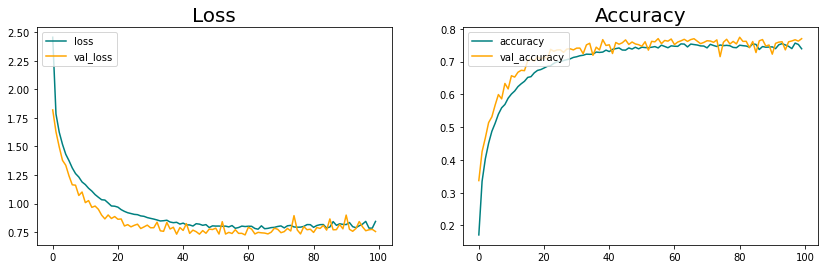

In [21]:
plt.figure(figsize=(14,4))

# Loss visualization
plt.subplot(1,2,1)
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc='upper left')

# Accuracy visualisation
plt.subplot(1,2,2)
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

° EVALUATION METRICS

In [22]:
# Predicting
y_test_pred2 = model2.predict(x_test).argmax(axis=1)
# Creating a confusion matrix
cm2 = confusion_matrix(y_test, y_test_pred2)
cm_df2 = pd.DataFrame(cm2)

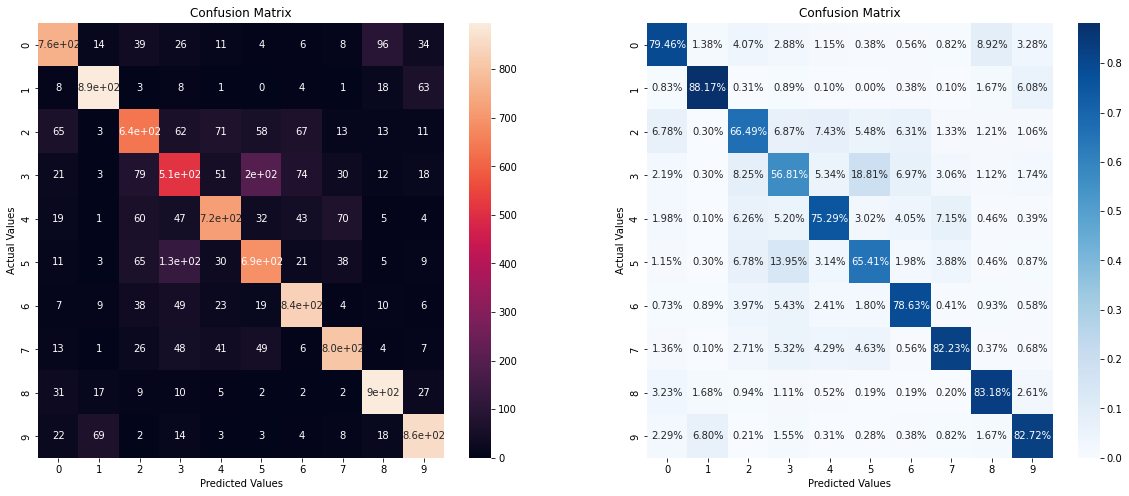

In [23]:
# Vizualise the confusion matrix through seaborn library
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.subplot(1,2,2)
sns.heatmap(cm_df2/np.sum(cm_df2), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

Contrary to the first model, this model is better able to distinguish the different classes. Indeed, by observing the confusion matrix, we notice that fewer classification errors are made. Here, even if no class is perfectively predicted, the number of errors remains slightly lower than before. 

In [24]:
# Plotting a classification report
print('\nClassification Report:\n', classification_report(y_test, y_test_pred2, target_names=classes))


Classification Report:
               precision    recall  f1-score   support

    Airplane       0.79      0.76      0.78      1000
  Automobile       0.88      0.89      0.89      1000
        Bird       0.66      0.64      0.65      1000
         Cat       0.57      0.51      0.54      1000
        Deer       0.75      0.72      0.74      1000
         Dog       0.65      0.69      0.67      1000
        Frog       0.79      0.83      0.81      1000
       Horse       0.82      0.81      0.81      1000
        Ship       0.83      0.90      0.86      1000
       Truck       0.83      0.86      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



Displaying the classification report, we see that the precision has improved from 71% to 76%, which implies that the proportion of true positives among the number of positive images identified for each class has increased, so that our model makes fewer errors when predicting that an image belongs to a class. 

According to the recall, improvement also occured. Indeed it has increased from 70% to 76%. This means that the model was not able to correctly classify all images belonging to each class. 

Therefore, although the model performs better than the previous one, this performance does not seem to have changed that much since the f1-score only increased by 6% from 70% to 76%.

In short, although the performance of this model is not yet good enough, we can say that it is still a little better than the previous one. So let's try to improve its performance even more. 

# 3 _ ADVANCED TRIAL

Still with a view to improvement I wanted to apply some more trials modifying the architecture of the CNN model by adding a kernel initializer, varying the dropout values and by applying batchnormalization steps known to accelerate the learning process and to improve the results of the training. But it occured that even if it improved a bit the performances this does not necessarily allow us to obtain better results in a significant way.  

° DEFINE MODEL

In [28]:
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(254, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))


adm=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model3.compile(optimizer=adm, loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_23 (Bat  (None, 16, 16, 64)      

° FIT/TRAIN MODEL

In [29]:
#hist3 = model3.fit(x_train, y_train_HE, batch_size=128, epochs=100, validation_split=0.2, verbose=1)
hist3 = model3.fit(x_train, y_train_HE, batch_size=128, epochs=100, validation_data=(x_test, y_test_HE), verbose=1)

Epoch 1/100
391/391 [==============================] - 36s 89ms/step - loss: 1.9792 - accuracy: 0.2949 - val_loss: 1.6234 - val_accuracy: 0.3983
Epoch 2/100
391/391 [==============================] - 34s 86ms/step - loss: 1.5372 - accuracy: 0.4325 - val_loss: 1.4508 - val_accuracy: 0.4769
Epoch 3/100
391/391 [==============================] - 33s 84ms/step - loss: 1.3484 - accuracy: 0.5114 - val_loss: 1.2121 - val_accuracy: 0.5704
Epoch 4/100
391/391 [==============================] - 33s 85ms/step - loss: 1.2176 - accuracy: 0.5651 - val_loss: 1.3430 - val_accuracy: 0.5446
Epoch 5/100
391/391 [==============================] - 34s 88ms/step - loss: 1.1204 - accuracy: 0.6039 - val_loss: 0.9891 - val_accuracy: 0.6526
Epoch 6/100
391/391 [==============================] - 36s 92ms/step - loss: 1.0476 - accuracy: 0.6327 - val_loss: 1.1226 - val_accuracy: 0.6102
Epoch 7/100
391/391 [==============================] - 36s 91ms/step - loss: 0.9794 - accuracy: 0.6590 - val_loss: 0.8767 - val_ac

° DATA BACKUP

In [30]:
# Save the model 3 as h5 file
#model3.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models', 'Cifar-10_Classifier_Model3.h5'))
#model3.save(os.path.join('Cifar-10_Classifier_Model3.h5'))

# Save histrory of the model 3
#np.save('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_hist3_model3.npy',hist3)
#np.save('Cifar-10_hist3_model3.npy',hist3)

In [ ]:
# Load the model 3 saved 
#model3 = load_model('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_Classifier_Model3.h5')
#model3 = load_model('Cifar-10_Classifier_Model3.h5')

# Load history model 3
#hist3 = np.load('/content/drive/MyDrive/Colab Notebooks/Cifar-10_Saved_Models/Cifar-10_hist3_model3.npy',allow_pickle='TRUE').item()
#hist3 = np.load('Cifar-10_hist3_model3.npy',allow_pickle='TRUE').item()

° VISUALIZATION

In [31]:
# ultimate score visualization
score3 = model3.evaluate(x_test, y_test_HE, verbose=1)

print(f'Val loss: {score3[0]: 4.4f}')
print(f'Val accuracy: {score3[1]: 4.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.5371 - accuracy: 0.8332
Val loss:  0.5371
Val accuracy:  0.8332


At the end of the training of this third model, we could have expected that the performances would be better, in particular by the use of kernel initializer and batchormalization, but it turns out that the performances presented are only slightly better than those proposed by the second model. 

Moreover, by observing the loss and accuracy curves, we notice that the testing curve start to move away from the training curve from 30 iterations. This suggests a case of overfitting.

Therefore, although the results seem better (loss:0.53 accuracy:83%) than those presented by the second model, the divergence of the test curve shows that this model can still be improved.

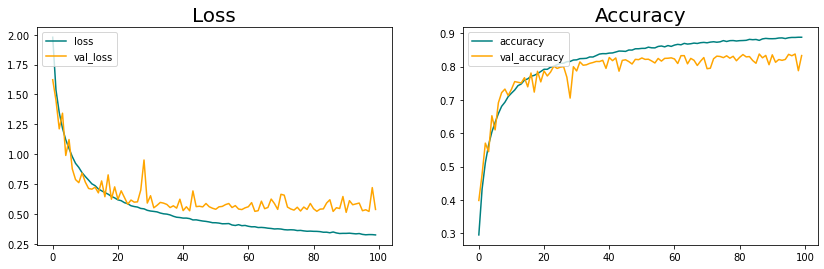

In [32]:
plt.figure(figsize=(14,4))

# Loss visualization
plt.subplot(1,2,1)
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc='upper left')

# Accuracy visualisation
plt.subplot(1,2,2)
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc='upper left')

plt.show()

° EVALUATION METRICS

In [33]:
# Predicting
y_test_pred3 = model3.predict(x_test).argmax(axis=1)
# Creating a confusion matrix
cm3 = confusion_matrix(y_test, y_test_pred3)
cm_df3 = pd.DataFrame(cm3)

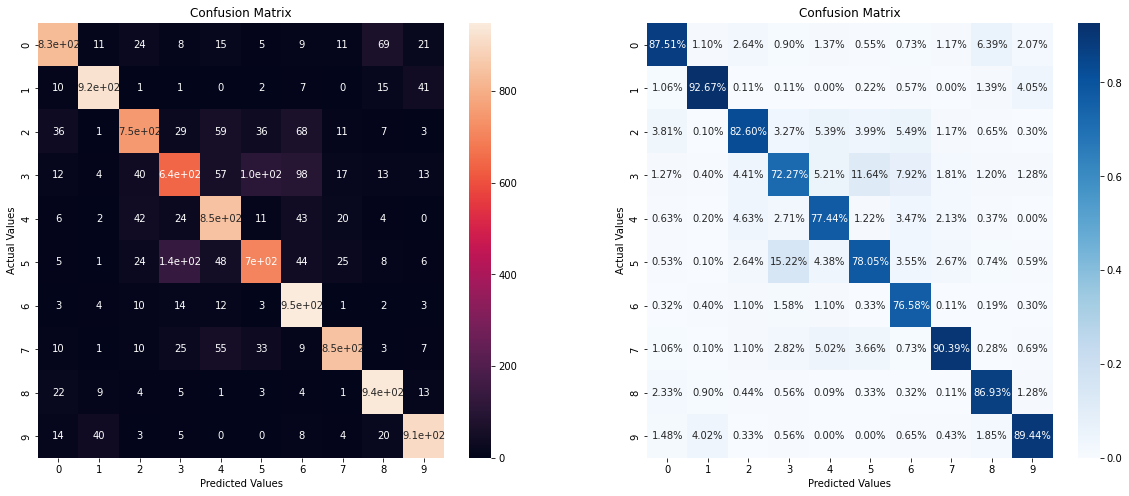

In [34]:
# Vizualise the confusion matrix through seaborn library
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.subplot(1,2,2)
sns.heatmap(cm_df3/np.sum(cm_df3), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

Looking at the confusion matrix, we see that the predictions for each class are more truthfull than thoses presented previously. Indeed, they all have a correct prediction rate of more than 70%.

In [35]:
# Plotting a classification report
print('\nClassification Report:\n', classification_report(y_test, y_test_pred3, target_names=classes))


Classification Report:
               precision    recall  f1-score   support

    Airplane       0.88      0.83      0.85      1000
  Automobile       0.93      0.92      0.92      1000
        Bird       0.83      0.75      0.79      1000
         Cat       0.72      0.64      0.68      1000
        Deer       0.77      0.85      0.81      1000
         Dog       0.78      0.70      0.74      1000
        Frog       0.77      0.95      0.85      1000
       Horse       0.90      0.85      0.87      1000
        Ship       0.87      0.94      0.90      1000
       Truck       0.89      0.91      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



Finally, if we look at the precision of this third model we see that the precision is not so bad, 83%, as well as the recall. According to the f1-score of 83%, this model is more efficient thanks to the modifications made. 

**CONCLUSION**

In conclusion, this exercise allowed me to test and propose different neural network convolution (CNN) architectures in order to classify images from the cifar-10 dataset. 

The best performance reached in the time limit attributed to this project is 83% for the second third model. This means that the model has an 83% chance of correctly assigning an image of the dataset to the right class. 

With regard to the improvement, I could not test much more complex models due to the lack of time and computing power available to me, but I suggest that by  defining more complexe network and/or using methods like transfer learning, fine-tunin and grid-search, it is quite possible to define a much better performing model.